In [1]:
cd C:/Users/Watson Turbo/Desktop

C:\Users\Watson Turbo\Desktop


In [2]:
pwd

'C:\\Users\\Watson Turbo\\Desktop'

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#For Dickey-Fuller Stationarity Test
from statsmodels.tsa.stattools import adfuller

In [5]:
#Create dataframes from FRED data
cpi = pd.read_csv("CPI.csv")
wti = pd.read_csv("WTI.csv")
ind = pd.read_csv("Industrial Production.csv")
debt = pd.read_csv("Debt.csv")
rate = pd.read_csv("3 Month Treasury Bill.txt")
ten_rate = pd.read_csv("ten_rate.csv")

In [6]:
cpi.head()

,Date,CPI
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [7]:
wti.head()

,Date,WTI
0,1/1/1947,1.62
1,2/1/1947,1.62
2,3/1/1947,1.62
3,4/1/1947,1.87
4,5/1/1947,1.87


In [8]:
ind.head()

,Date,Prod
0,1/1/1947,14.0679
1,2/1/1947,14.1510
2,3/1/1947,14.2341
3,4/1/1947,14.1233
4,5/1/1947,14.1787


In [9]:
debt.head()

,Date,Debt
0,1/1/1947,267.0
1,2/1/1947,268.8
2,3/1/1947,266.7
3,4/1/1947,265.0
4,5/1/1947,265.7


In [10]:
rate.head()

,Date,Rate
0,1/1/1947,0.38
1,2/1/1947,0.38
2,3/1/1947,0.38
3,4/1/1947,0.38
4,5/1/1947,0.38


In [11]:
ten_rate.head()

,Date,Ten_Rate
0,1/1/1962,4.10
1,2/1/1962,4.00
2,3/1/1962,3.86
3,4/1/1962,3.86
4,5/1/1962,3.90


In [12]:
#Check date types
debt.dtypes, wti.dtypes, cpi.dtypes, ind.dtypes, rate.dtypes, ten_rate.dtypes

(Date     object
 Debt    float64
 dtype: object, Date     object
 WTI     float64
 dtype: object, Date     object
 CPI     float64
 dtype: object, Date     object
 Prod    float64
 dtype: object, Date     object
 Rate    float64
 dtype: object, Date         object
 Ten_Rate    float64
 dtype: object)

In [13]:
#Convert Dates to be measurable
wti['Date'] = wti['Date'].astype('datetime64[ns]')
cpi['Date'] = cpi['Date'].astype('datetime64[ns]')
ind['Date'] = ind['Date'].astype('datetime64[ns]')
debt['Date'] = debt['Date'].astype('datetime64[ns]')
rate['Date'] = rate['Date'].astype('datetime64[ns]')
ten_rate['Date'] = ten_rate['Date'].astype('datetime64[ns]')
## Alternative Change index to datetime
#df.index = pd.to_datetime(df.index)

In [18]:
#Merge Dataframes based on Date
econ = pd.merge(wti, cpi)
econ = pd.merge(econ, ind)
econ = pd.merge(econ, debt)
econ = pd.merge(econ, rate)
# Note: Merging with Ten Year Treasury starts at 1962
# We will save this for later
econ_1962 = pd.merge(econ, ten_rate)

In [19]:
econ.head()

,Date,WTI,CPI,Prod,Debt,Rate
0,1947-01-01,1.62,21.48,14.0679,267.0,0.38
1,1947-02-01,1.62,21.62,14.1510,268.8,0.38
2,1947-03-01,1.62,22.00,14.2341,266.7,0.38
3,1947-04-01,1.87,22.00,14.1233,265.0,0.38
4,1947-05-01,1.87,21.95,14.1787,265.7,0.38


In [20]:
# see if any columns have nulls
display(econ.isnull().any())

Date    False
WTI     False
CPI     False
Prod    False
Debt    False
Rate    False
dtype: bool

In [21]:
#Explore Stats
econ.describe(include='all')

,Date,WTI,CPI,Prod,Debt,Rate
count,869,869.000000,869.000000,869.000000,869.000000,869.000000
unique,869,NaN,NaN,NaN,NaN,NaN
top,1995-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
first,1947-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2019-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.269162,108.923838,58.640564,4597.646145,4.057135
std,NaN,27.625947,76.907265,30.450577,6110.097682,3.081321
min,NaN,1.620000,21.480000,13.569500,253.800000,0.010000
25%,NaN,3.000000,31.280000,31.376000,308.900000,1.550000


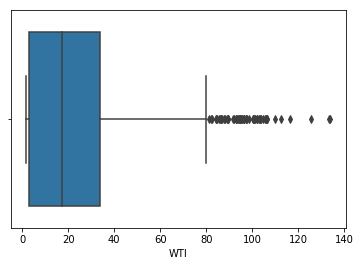

In [22]:
#Box Plot
sns.boxplot(x="WTI",data=econ)

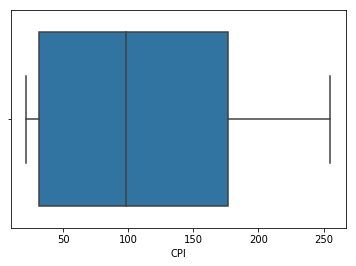

In [23]:
sns.boxplot(x="CPI",data=econ)

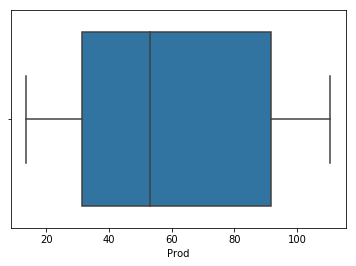

In [24]:
sns.boxplot(x="Prod",data=econ)

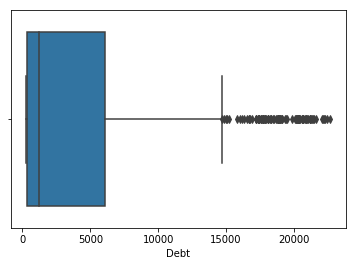

In [25]:
sns.boxplot(x="Debt",data=econ)

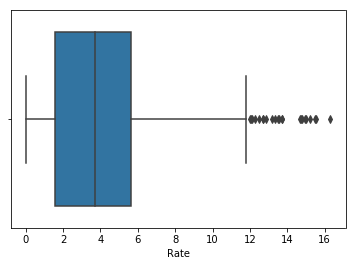

In [26]:
sns.boxplot(x="Rate",data=econ)

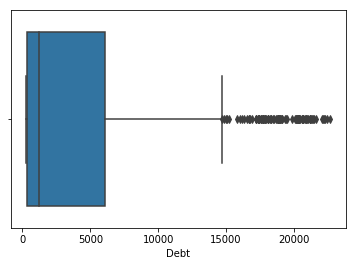

In [27]:
sns.boxplot(x="Debt",data=econ)

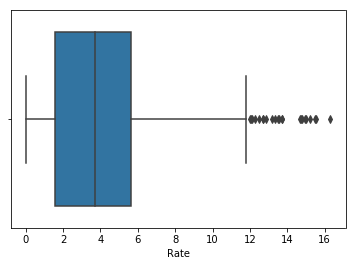

In [28]:
sns.boxplot(x="Rate",data=econ)

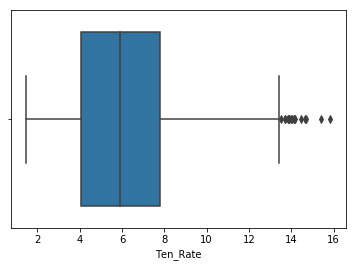

In [29]:
sns.boxplot(x="Ten_Rate",data=econ_1962)

Debt and Oil boxplots show numerous outliers beyond the 75th percentile. Likely both from recent spikes.

The 3 Month and 10 Year Treasury Rate likely shows outliers from the 1980's credit crunch.

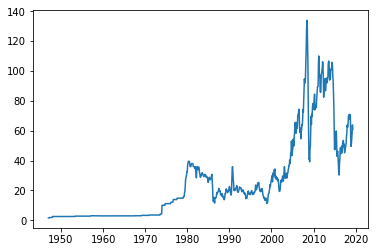

In [30]:
#Plot Oil Price with Matplotlib
from pandas import Series
x = econ['Date']
oil = econ['WTI']
plt.plot(x,oil)
plt.show()

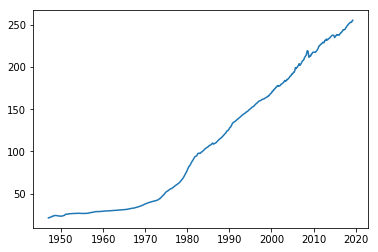

In [31]:
#Plot Inflation
cpi = econ['CPI']
plt.plot(x, cpi)
plt.show()

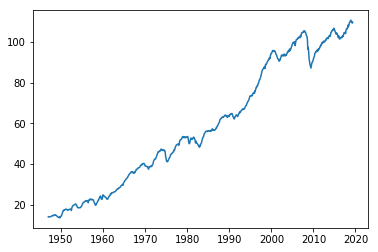

In [32]:
#Plot Industrial Production Index
prod = econ['Prod']
plt.plot(x, prod)
plt.show()

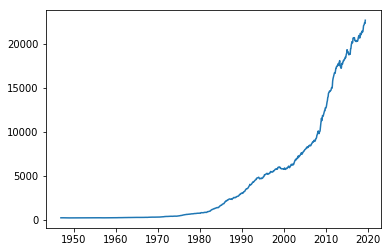

In [33]:
#Plot Federal Debt
debt = econ['Debt']
plt.plot(x, debt)
plt.show()

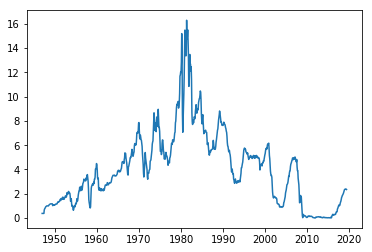

In [38]:
#Plot 3 Month Treasury Yield
Rate = econ['Rate']
plt.plot(x, Rate)
plt.show()

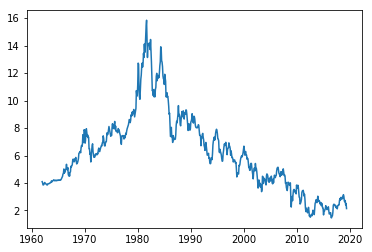

In [42]:
#Plot 10 Year Treasury Yield
date = econ_1962['Date']
Ten_Rate = econ_1962['Ten_Rate']
plt.plot(date, Ten_Rate)
plt.show()

None of our data seems very stationary.
Therefore, we canot assume Constant Mean and Constant Variance.

Notes:
1. The stronger the autocorrelation, the easier it is to forecast
2. Most Time Series models assume stationarity
3. LSTM Neural Networks are more robust on stationary data
4. First Order Differencing may be sufficient for LSTM, however, 2nd Order Differencing and seasonal detrending may be required
5. Dickey-Fuller test is good to see if data is stationary
6. ARIMA typically outperforms LSTM, especially with sparse data

AR = Auto Regressive models the series on its own autocorrelation

MA = Moving Average models local suprises or shocks

p, d, and q = number of AR lags, degree of differencing, order or MA portion

ARIMAX = allows for inclusion of covariates (additional time series that is correlated to the dependent variable 

ARIMAX = "A common practice amongst traders is to attempt to predict the value of some commodity by using one or more lags from another commodity as well as autoregressive portions of the commodity we're forecasting. This is a case where the ARIMAX model would be useful.

If you have many covariates with intricate higher order interactions, you've landed in the sweet spot of LSTM for time series prediction. At the beginning of the book, we talked about how a <b>multilayer perceptron can model complicated interactions between input variables giving us automatic feature engineering that provides lift over a linear or logistic regression<b>. This property is carried forward to using LSTMs for time series prediction with many input variables."


In [44]:
#Wrap function around first-order differencing
#If unable to fill first order, use 0
def diff_data(econ):
    df_diffed = df.diff()
    df_diffed.fillna(0, inplace=True)
    return df_diffed

In [45]:
#MinMax Scaler to convert between -1 and 1
#Thus scaling to actiovation function, tanh (hyperbolic tangent function)
def scale_data(econ, scaler=None):
    scaled_df = pd.DataFrame(index=econ.index)
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1,1))
        #Lets start with CPI
    scaled_df["CPI"] = scaler.fit_transform(econ.Close.values.reshape(-1,1))
    return scaler, scaled_df

In [46]:
#Structure for the BPTT Algo
#Train the datset
def lag_dataframe(econ, lags=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(lags, 0, -1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)

    cols = df.columns.tolist()
    for i, col in enumerate(cols):
        if i == 0:
            cols[i] = "x"
        else:
            cols[i] = "x-" + str(i)

    cols[-1] = "y"
    df.columns = cols
    return df

Note: 
1. Calling lag_dataframe = 3 = xt1, xt2, xt3
2. Consider how many lags to wait before making prediction
3. Keras expects 3D Input Shape for LSTM

SAMPLES*SEQUENCE LENGTH(timesteps)* FEATURES per Timestep
1st Dimension: # of Observations we have
2nd Dimension: # of lags chosen for lag_dataframe function (# of timesteps given to make prediction)
3rd Dimension: # of features present in Timestep("Price")


<b>Why LSTM is Great<b>
    
The power of defining a 3D matrix here gives us free feature engineering in our LSTM. 

We could include hundreds of other Time Series as features to predict this one.

In [47]:
#To reshape 2D matrix to 3D matrix

X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

NameError: name 'X_train' is not defined

In [ ]:
def test_stationarity(df, CPI):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[CPI].rolling(window = 12, center = False).mean()
    rolstd = df[CPI].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[CPI], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(CPI))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[CPI], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
test_stationarity(df, 'CPI')

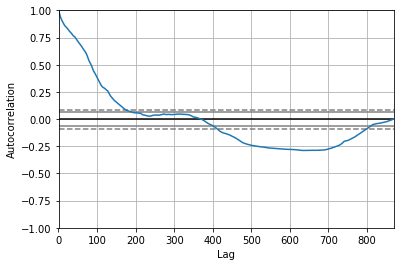

In [23]:
#Auto Correlation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil)
plt.show()

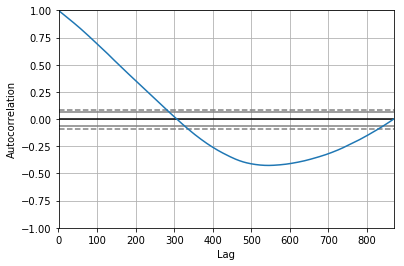

In [24]:
autocorrelation_plot(cpi)
plt.show()

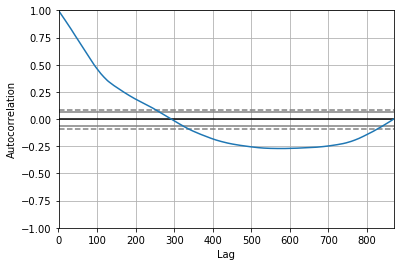

In [25]:
autocorrelation_plot(debt)
plt.show()

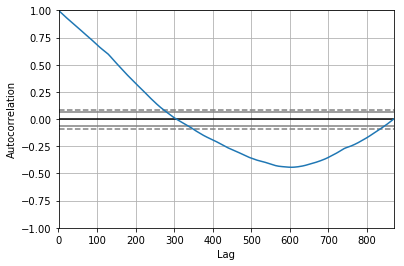

In [26]:
autocorrelation_plot(prod)
plt.show()

In [27]:
#Correlation Table
econ.corr()

,WTI,CPI,Prod,Debt
WTI,1.000000,0.839266,0.801016,0.814546
CPI,0.839266,1.000000,0.975032,0.903188
Prod,0.801016,0.975032,1.000000,0.840951
Debt,0.814546,0.903188,0.840951,1.000000


## Woah! All of these Economic Indicators are Highly correlated!

In [28]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [29]:
#Define Predictor Vairable X and Target Variable Y
x = econ[ ['WTI']]
y = econ[ ['CPI']]
#Fit the Model
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#Obtain the prediction
Yhat=lm.predict(x)

In [31]:
#View Intercept and Slope
lm.intercept_, lm.coef_

(array([49.88460156]), array([[2.33641446]]))

In [32]:
#OIl Price = 49.88- 2.34 * CPI

C:\Users\Watson Turbo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


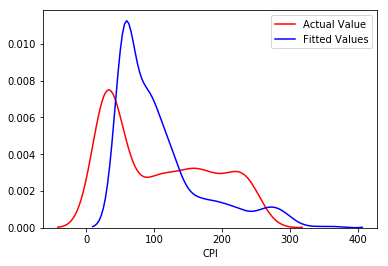

In [33]:
#Distribution Plot
ax1 = sns.distplot(econ['CPI'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

In [34]:
# P Value of same dataframe, note it should match the Correlation Table
from scipy import stats
pearson_coef, p_value = stats.pearsonr(econ['WTI'], econ['CPI'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8392661214888024  with a P-value of P = 1.2013961885775618e-231


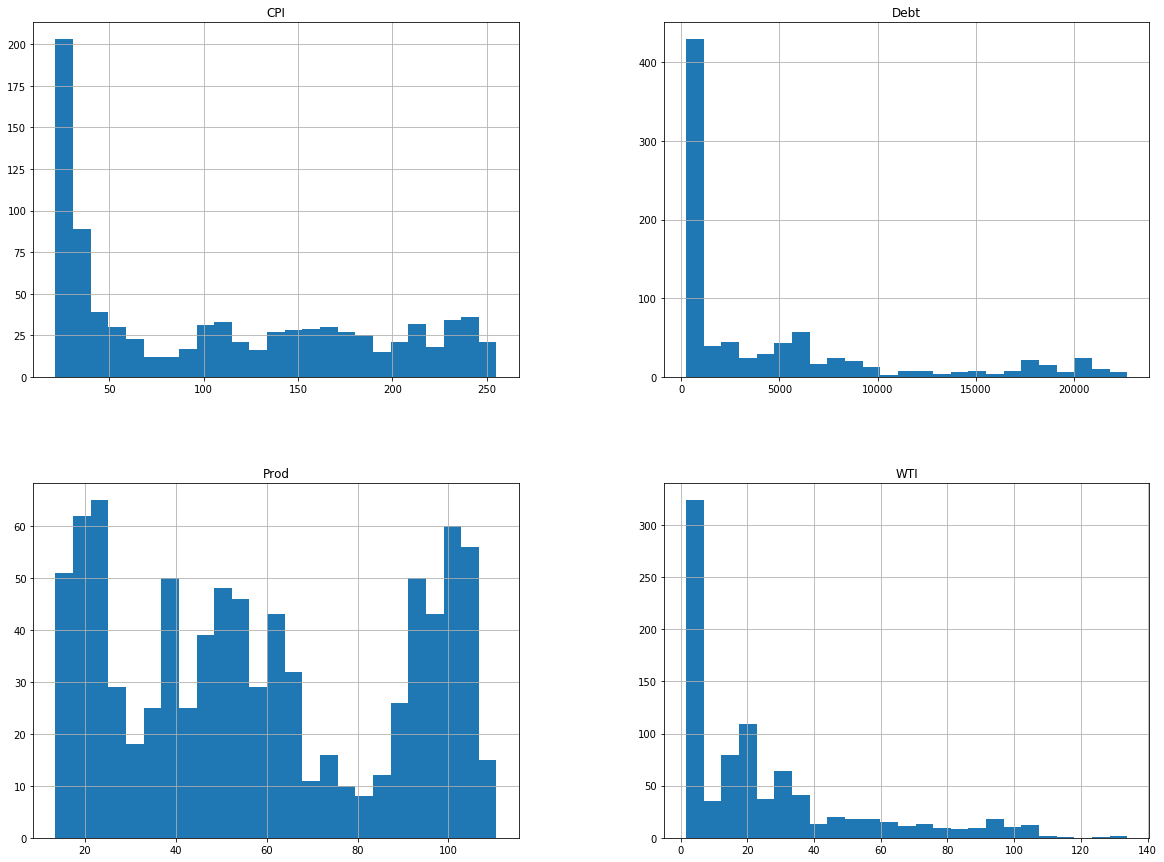

In [35]:
#Histogram
econ.hist(bins=25, figsize=(20,15))
plt.show()

(0, 413.407346631478)

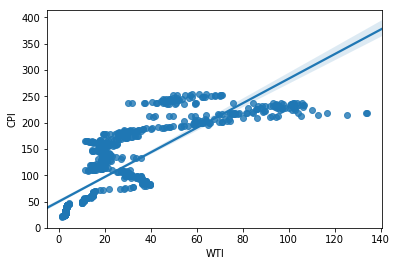

In [36]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 28235.85168567123)

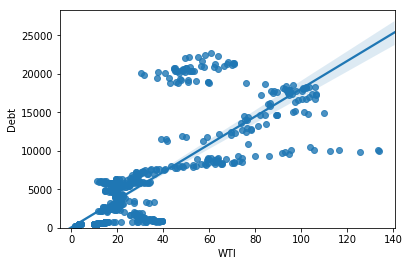

In [37]:
sns.regplot(x="WTI",y="Debt", data=econ)
plt.ylim(0,)

(0, 174.1536600438619)

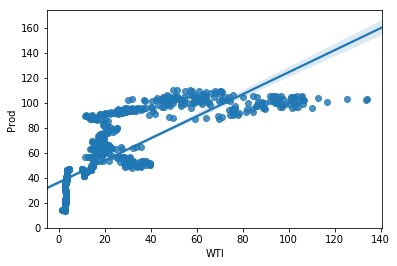

In [38]:
sns.regplot(x="WTI",y="Prod", data=econ)
plt.ylim(0,)

(0, 413.52590680093687)

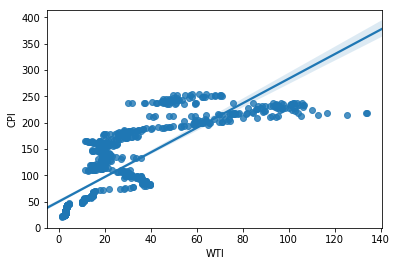

In [39]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 140.94066870447)

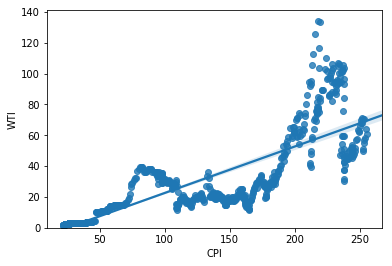

In [40]:
sns.regplot(x="CPI",y="WTI", data=econ)
plt.ylim(0,)

(0, 23979.33815861822)

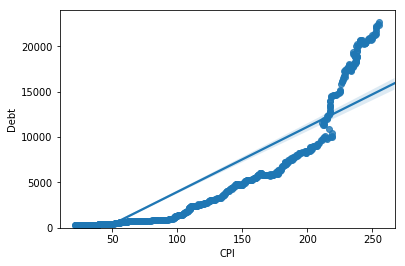

In [41]:
sns.regplot(x="CPI",y="Debt", data=econ)
plt.ylim(0,)

(0, 125.95028966127063)

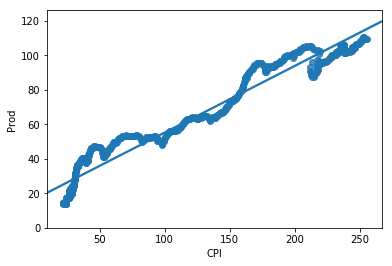

In [42]:
sns.regplot(x="CPI",y="Prod", data=econ)
plt.ylim(0,)

(0, 268.90238255518875)

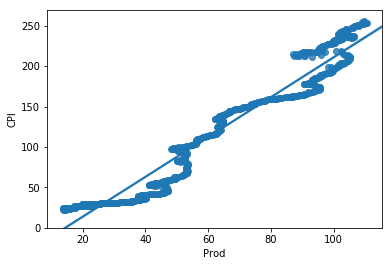

In [43]:
sns.regplot(x="Prod",y="CPI", data=econ)
plt.ylim(0,)

(0, 141.291829900825)

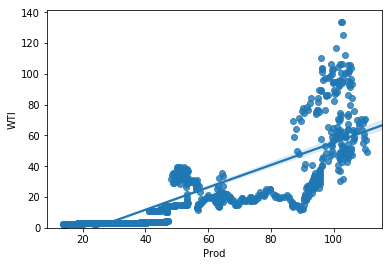

In [44]:
sns.regplot(x="Prod",y="WTI", data=econ)
plt.ylim(0,)

(0, 24053.06316399457)

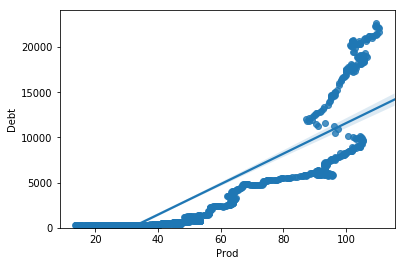

In [45]:
sns.regplot(x="Prod",y="Debt", data=econ)
plt.ylim(0,)

(0, 149.96771916586297)

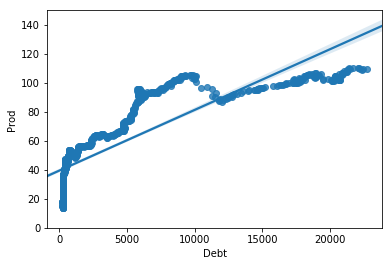

In [46]:
sns.regplot(x="Debt",y="Prod", data=econ)
plt.ylim(0,)

(0, 140.58768499769468)

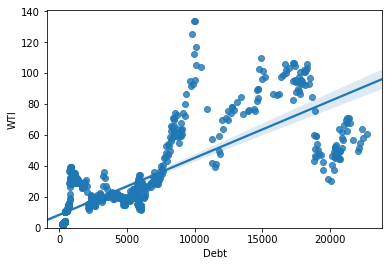

In [47]:
sns.regplot(x="Debt",y="WTI", data=econ)
plt.ylim(0,)

(0, 353.1521456935714)

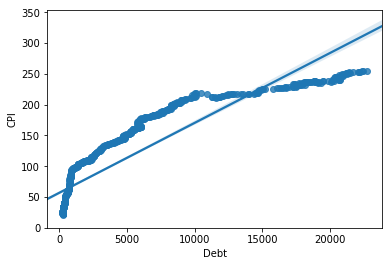

In [48]:
sns.regplot(x="Debt",y="CPI", data=econ)
plt.ylim(0,)

#Residual Plot to determine if Linear Regression is appropriate

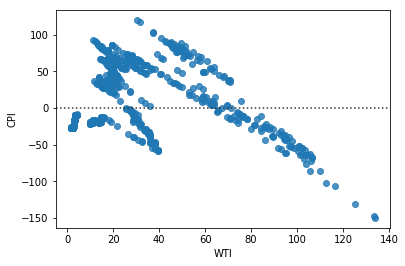

In [49]:
#
sns.residplot(econ['WTI'], econ['CPI'], robust=True)

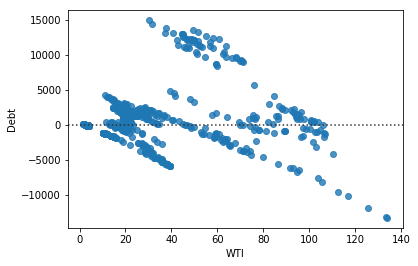

In [50]:
#
sns.residplot(econ['WTI'], econ['Debt'], robust=True)

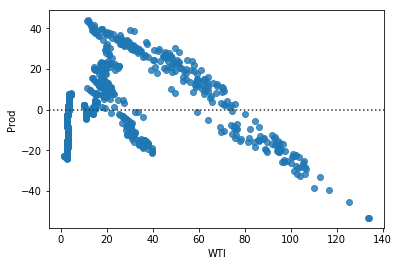

In [51]:
#
sns.residplot(econ['WTI'], econ['Prod'], robust=True)

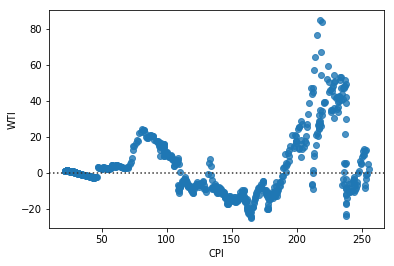

In [52]:
#
sns.residplot(econ['CPI'], econ['WTI'], robust=True)

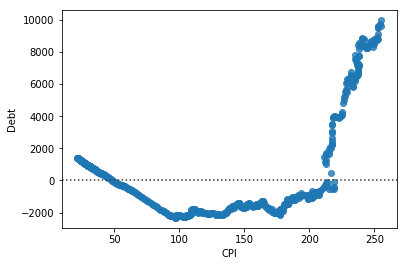

In [53]:
#
sns.residplot(econ['CPI'], econ['Debt'], robust=True)

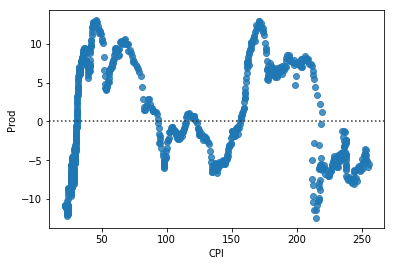

In [54]:
#
sns.residplot(econ['CPI'], econ['Prod'], robust=True)

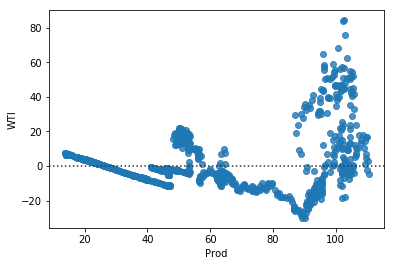

In [55]:
#
sns.residplot(econ['Prod'], econ['WTI'], robust=True)

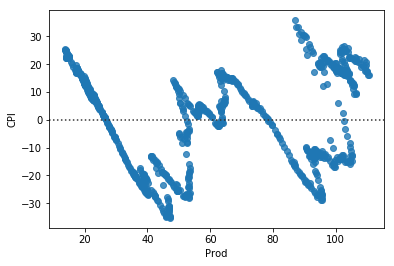

In [56]:
#
sns.residplot(econ['Prod'], econ['CPI'], robust=True)

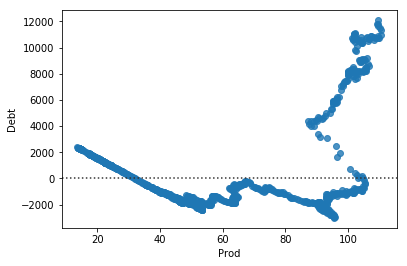

In [57]:
#
sns.residplot(econ['Prod'], econ['Debt'], robust=True)

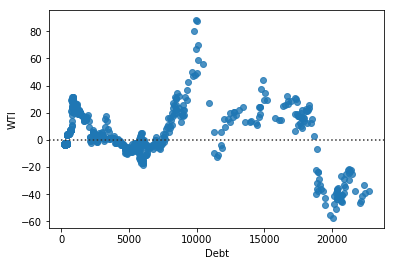

In [58]:
#
sns.residplot(econ['Debt'], econ['WTI'], robust=True)

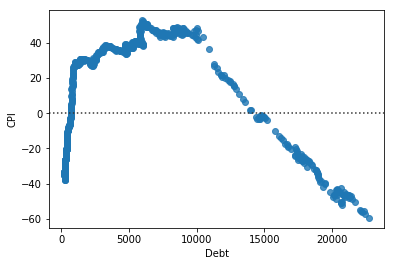

In [59]:
#
sns.residplot(econ['Debt'], econ['CPI'], robust=True)

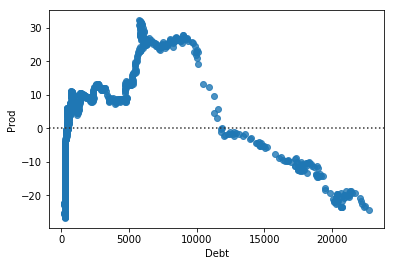

In [60]:
#
sns.residplot(econ['Debt'], econ['Prod'], robust=True)

In [61]:
#To call 5 highest Months of Oil Prices 
econ.nlargest(5, 'WTI')

,Date,WTI,CPI,Prod,Debt
737,2008-06-01,133.93,217.463,102.8445,9969.0
738,2008-07-01,133.44,219.016,102.3002,10045.5
736,2008-05-01,125.39,215.208,103.0863,9824.8
739,2008-08-01,116.61,218.690,100.7353,10134.7
735,2008-04-01,112.57,213.942,103.6704,9932.8


In [62]:
#To call 5 highest Months of Inflation
econ.nlargest(5, 'CPI')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
867,2019-04-01,63.86,254.958,109.1657,22346.6
866,2019-03-01,58.15,254.148,109.5985,22425.2
865,2019-02-01,54.95,253.113,109.4709,22221.4
861,2018-10-01,70.75,252.794,109.9165,21419.9


In [63]:
#To call 5 highest Months of Production
econ.nlargest(5, 'Prod')

,Date,WTI,CPI,Prod,Debt
863,2018-12-01,49.52,252.723,110.5516,22075.2
862,2018-11-01,56.96,252.760,110.5067,21683.9
864,2019-01-01,51.38,252.673,110.0907,22160.0
861,2018-10-01,70.75,252.794,109.9165,21419.9
860,2018-09-01,70.23,252.010,109.6749,21353.1


In [64]:
#To call 5 highest Months of Debt
econ.nlargest(5, 'Debt')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
866,2019-03-01,58.15,254.148,109.5985,22425.2
867,2019-04-01,63.86,254.958,109.1657,22346.6
865,2019-02-01,54.95,253.113,109.4709,22221.4
864,2019-01-01,51.38,252.673,110.0907,22160.0


In [65]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.3364144639339086
intercept 49.88460155937028
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.05140633509958201
r-squared: 0.7043676226788571


In [66]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.882916493611895
intercept 36.3300040766315
r_value 0.8010161611474097
p_value 2.15420852806911e-195
std_err 0.022409724128482012
r-squared: 0.6416268904193331


In [67]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 180.15508916077238
intercept 45.277965842734375
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 4.357361974143156
r-squared: 0.6634850065995124


In [68]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.301473746868048
intercept -7.568515232625909
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.0066330955806237595
r-squared: 0.7043676226788571


In [69]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.38605318001320255
intercept 16.5901702712182
r_value 0.9750322408231151
p_value 0.0
std_err 0.002986039078698132
r-squared: 0.9506878706445452


In [70]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 71.75613995525735
intercept -3218.3080006662767
r_value 0.9031882597022928
p_value 1.077e-320
std_err 1.1581801688906967
r-squared: 0.8157490324640563


In [71]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.7267129961459007
intercept -17.34569785853188
r_value 0.8010161611474096
p_value 2.1542085280694776e-195
std_err 0.01844504874701193
r-squared: 0.6416268904193329


In [72]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.4625826696001654
intercept -35.48339941886681
r_value 0.9750322408231153
p_value 0.0
std_err 0.01904755216807009
r-squared: 0.9506878706445456


In [73]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 168.742055047499
intercept -5297.483169239187
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 3.6874795991663865
r-squared: 0.7071986355078733


In [74]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.0036828546431314593
intercept 8.336699802898544
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 8.907620013973956e-05
r-squared: 0.6634850065995124


In [75]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.011368351655659104
intercept 56.65617957995393
r_value 0.9031882597022929
p_value 1.077e-320
std_err 0.0001834909103077444
r-squared: 0.8157490324640565


In [76]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.004191004046435283
intercept 39.37181061398917
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 9.158500479861811e-05
r-squared: 0.7071986355078733


## Multiple Linear Regression

In [77]:
#Introducing the 3 Month Treasury Bill
rate = pd.read_csv("3 Month Treasury Bill.txt")

In [78]:
rate.dtypes

Date     object
Rate    float64
dtype: object

In [79]:
rate['Date'] = rate['Date'].astype('datetime64[ns]')

In [80]:
display(rate.isnull().any())

Date    False
Rate    False
dtype: bool

In [81]:
econ = pd.merge(econ, rate)

In [82]:
econ.head()

,Date,WTI,CPI,Prod,Debt,Rate
0,1947-01-01,1.62,21.48,14.0679,267.0,0.38
1,1947-02-01,1.62,21.62,14.1510,268.8,0.38
2,1947-03-01,1.62,22.00,14.2341,266.7,0.38
3,1947-04-01,1.87,22.00,14.1233,265.0,0.38
4,1947-05-01,1.87,21.95,14.1787,265.7,0.38


In [83]:
econ.corr()

,WTI,CPI,Prod,Debt,Rate
WTI,1.000000,0.839266,0.801016,0.814546,-0.230122
CPI,0.839266,1.000000,0.975032,0.903188,-0.243221
Prod,0.801016,0.975032,1.000000,0.840951,-0.135257
Debt,0.814546,0.903188,0.840951,1.000000,-0.458995
Rate,-0.230122,-0.243221,-0.135257,-0.458995,1.000000


In [84]:
test_target = econ
target = test_target['Rate']
features = test_target.iloc[:,1:5]
features.head()

,WTI,CPI,Prod,Debt
0,1.62,21.48,14.0679,267.0
1,1.62,21.62,14.1510,268.8
2,1.62,22.00,14.2341,266.7
3,1.87,22.00,14.1233,265.0
4,1.87,21.95,14.1787,265.7


In [85]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=0)
regression_model = linear_model.LinearRegression().fit(X_train, y_train)

## Test
sklearn.linear_model vs. sklearn.linear_model import LinearRegression

In [86]:
#LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

1.3188398426748993
[ 0.0216513  -0.02395558  0.12730621 -0.00057784]


In [88]:
y_predtest = regressor.predict(X_test)

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predtest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predtest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predtest)))

Mean Absolute Error: 1.669156663330669
Mean Squared Error: 4.71191613072521
Root Mean Squared Error: 2.170694849748626


In [90]:
coeff_df = pd.DataFrame(regressor.coef_, features.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
WTI,0.021651
CPI,-0.023956
Prod,0.127306
Debt,-0.000578


In [91]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predtest})
df.head(25)

,Actual,Predicted
261,5.35,5.240025
820,0.02,-0.780040
77,2.11,3.150968
453,9.74,5.624108
571,4.48,4.450091
749,0.18,1.831344
278,6.63,5.235925
691,1.48,5.543330
844,0.89,-1.970667
345,5.96,5.396984


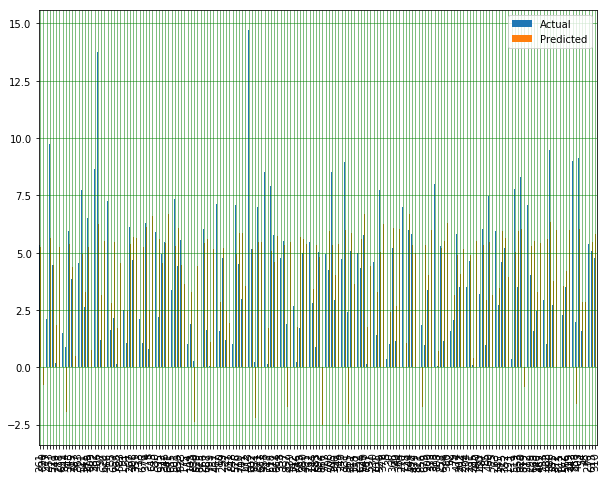

In [92]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

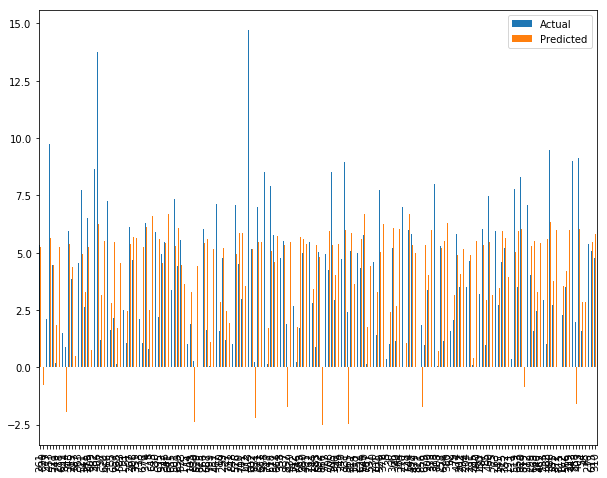

In [93]:
df.plot(kind='bar',figsize=(10,8))
plt.show()

Linear Regression Version 2

In [94]:
y_pred = regression_model.fit(X_train, y_train)
y_pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
regression_model.intercept_

1.3188398426748993

In [96]:
scores = cross_val_score(regression_model, features, target, cv=10)
scores

array([-3.51505803e+01, -1.94198124e+00, -1.64042128e-01, -1.63835182e-01,
       -1.57549470e+00, -4.49018142e+00,  2.38631945e-01, -5.21788383e+00,
       -5.14096234e+00, -2.50913570e+02])

In [97]:
print("The mean of the folds are", scores.mean(),"and the standard deviation is" ,scores.std())


The mean of the folds are -30.45198989659923 and the standard deviation is 74.162070913103


## LSTM Neural Network Model

In [98]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 12
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 12, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  #Calculate Mean Absolute Error
  train_lstmMAE = (mean_absolute_error(trainY[0], trainPredict[:,0]))
  print('Train Mean Absolute Error: %.2f MAE' % (train_lstmMAE))
  test_lstmMAE = (mean_absolute_error(testY[0], testPredict[:,0]))
  print('Test Mean Absolute Error: %.2f MAE' % (test_lstmMAE))

  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot, label='Train')
  plt.plot(testPredictPlot, label='Test')
  plt.legend()
  plt.show()
  plt.close()
  
  #print(testY)
  #print(testPredict)

  model.summary()

return

Predicting Production

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 0.0440
Epoch 2/5
 - 0s - loss: 0.0030
Epoch 3/5
 - 0s - loss: 9.6999e-04
Epoch 4/5
 - 0s - loss: 7.1280e-04
Epoch 5/5
 - 0s - loss: 5.4235e-04
Train Score: 2.12 RMSE
Test Score: 3.11 RMSE
Train Mean Absolute Error: 1.66 MAE
Test Mean Absolute Error: 1.93 MAE


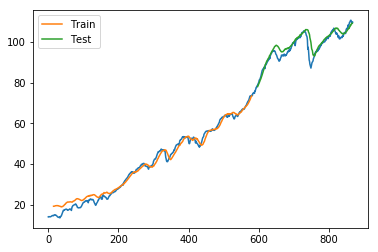

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 2s - loss: 0.0440
Epoch 2/5
 - 0s - loss: 0.0030
Epoch 3/5
 - 0s - loss: 9.7001e-04
Epoch 4/5
 - 0s - loss: 7.1280e-04
Epoch 5/5
 - 0s - loss: 5.4234e-04
Train Score: 2.12 RMSE
Test Score: 3.11 RMSE
Train Mean Absolute Error: 1.66 MAE
Test Mean Absolute Error: 1.93 MAE


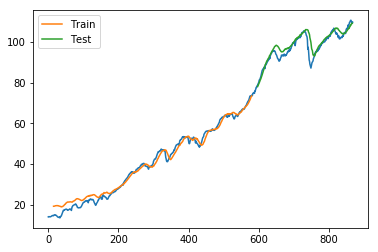

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 320       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 2s - loss: 0.0803
Epoch 2/5
 - 0s - loss: 0.0497
Epoch 3/5
 - 0s - loss: 0.0318
Epoch 4/5
 - 0s - loss: 0.0229
Epoch 5/5
 - 0s - loss: 0.0192
Train Score: 12.99 RMSE
Test Score: 42.54 RMSE
Train Mean Absolute Error: 11.35 MAE
Test Mean Absolute Error: 42.10 MAE


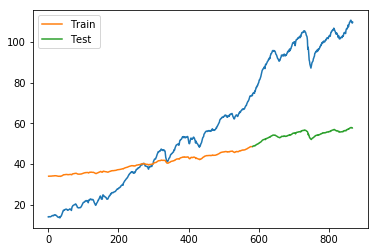

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [99]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 15, 
              epochs = 5)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 15, 
              epochs = 5)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 1, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 
              # Plot baseline and predictions

Predicting Debt

Epoch 1/5
 - 2s - loss: 0.0034
Epoch 2/5
 - 0s - loss: 0.0029
Epoch 3/5
 - 0s - loss: 0.0027
Epoch 4/5
 - 0s - loss: 0.0024
Epoch 5/5
 - 0s - loss: 0.0022
Train Score: 1012.26 RMSE
Test Score: 9172.86 RMSE
Train Mean Absolute Error: 764.53 MAE
Test Mean Absolute Error: 8103.43 MAE


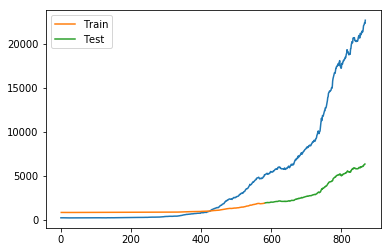

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 2s - loss: 0.0024
Epoch 2/5
 - 0s - loss: 0.0011
Epoch 3/5
 - 0s - loss: 3.4973e-04
Epoch 4/5
 - 0s - loss: 6.3040e-05
Epoch 5/5
 - 0s - loss: 2.6323e-05
Train Score: 112.15 RMSE
Test Score: 2954.95 RMSE
Train Mean Absolute Error: 77.10 MAE
Test Mean Absolute Error: 2402.26 MAE


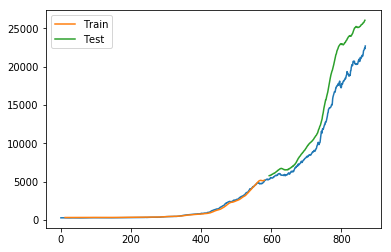

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 4)                 272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 - 2s - loss: 0.0034
Epoch 2/10
 - 0s - loss: 0.0029
Epoch 3/10
 - 0s - loss: 0.0027
Epoch 4/10
 - 0s - loss: 0.0024
Epoch 5/10
 - 0s - loss: 0.0022
Epoch 6/10
 - 0s - loss: 0.0019
Epoch 7/10
 - 0s - loss: 0.0016
Epoch 8/10
 - 0s - loss: 0.0013
Epoch 9/10
 - 0s - loss: 0.0010
Epoch 10/10
 - 0s - loss: 7.7414e-04
Train Score: 558.68 RMSE
Test Score: 4573.40 RMSE
Train Mean Absolute Error: 439.44 MAE
Test Mean Absolute Error: 4068.46 MAE


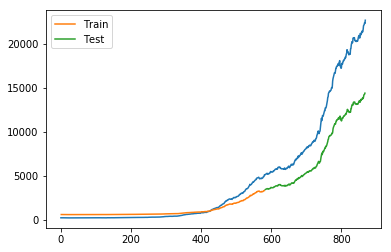

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [100]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 1, 
              epochs = 5)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 12, 
              epochs = 5)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 1, 
             epochs = 10, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Predicting Oil Price

Epoch 1/5
 - 2s - loss: 0.0073
Epoch 2/5
 - 0s - loss: 0.0041
Epoch 3/5
 - 0s - loss: 0.0029
Epoch 4/5
 - 0s - loss: 0.0019
Epoch 5/5
 - 0s - loss: 0.0010
Train Score: 3.49 RMSE
Test Score: 14.39 RMSE
Train Mean Absolute Error: 2.95 MAE
Test Mean Absolute Error: 11.22 MAE


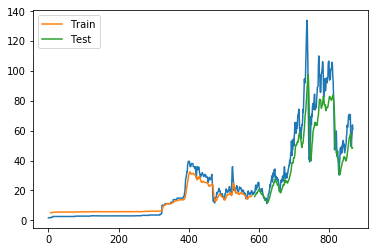

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 4)                 176       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 2s - loss: 0.0057
Epoch 2/5
 - 0s - loss: 0.0021
Epoch 3/5
 - 0s - loss: 9.7823e-04
Epoch 4/5
 - 0s - loss: 5.2041e-04
Epoch 5/5
 - 0s - loss: 4.1978e-04
Train Score: 2.67 RMSE
Test Score: 17.99 RMSE
Train Mean Absolute Error: 1.63 MAE
Test Mean Absolute Error: 11.21 MAE


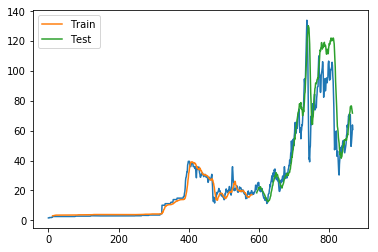

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4)                 272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 3s - loss: 0.0044
Epoch 2/5
 - 0s - loss: 0.0022
Epoch 3/5
 - 0s - loss: 0.0010
Epoch 4/5
 - 0s - loss: 3.9345e-04
Epoch 5/5
 - 0s - loss: 2.7186e-04
Train Score: 2.15 RMSE
Test Score: 14.24 RMSE
Train Mean Absolute Error: 1.03 MAE
Test Mean Absolute Error: 10.09 MAE


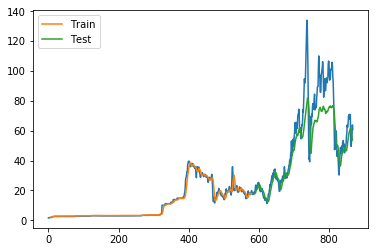

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [101]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 6, 
              epochs = 5)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 12, 
              epochs = 5)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 6, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Epoch 1/11
 - 2s - loss: 0.0418
Epoch 2/11
 - 0s - loss: 0.0205
Epoch 3/11
 - 0s - loss: 0.0115
Epoch 4/11
 - 0s - loss: 0.0072
Epoch 5/11
 - 0s - loss: 0.0041
Epoch 6/11
 - 0s - loss: 0.0020
Epoch 7/11
 - 0s - loss: 7.7220e-04
Epoch 8/11
 - 0s - loss: 2.7836e-04
Epoch 9/11
 - 0s - loss: 1.2479e-04
Epoch 10/11
 - 0s - loss: 8.7338e-05
Epoch 11/11
 - 0s - loss: 7.8100e-05
Train Score: 2.03 RMSE
Test Score: 3.82 RMSE
Train Mean Absolute Error: 1.72 MAE
Test Mean Absolute Error: 3.35 MAE


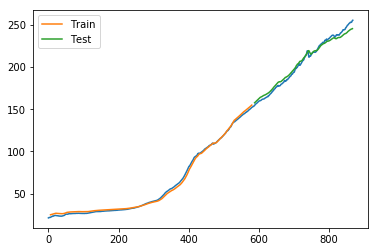

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 4)                 176       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
 - 3s - loss: 0.0616
Epoch 2/15
 - 0s - loss: 0.0412
Epoch 3/15
 - 0s - loss: 0.0299
Epoch 4/15
 - 0s - loss: 0.0232
Epoch 5/15
 - 0s - loss: 0.0183
Epoch 6/15
 - 0s - loss: 0.0136
Epoch 7/15
 - 0s - loss: 0.0091
Epoch 8/15
 - 0s - loss: 0.0053
Epoch 9/15
 - 0s - loss: 0.0026
Epoch 10/15
 - 0s - loss: 0.0011
Epoch 11/15
 - 0s - loss: 3.9981e-04
Epoch 12/15
 - 0s - loss: 1.9570e-04
Epoch 13/15
 - 0s - loss: 1.4611e-04
Epoch 14/15
 - 0s - loss: 1.3392e-04
Epoch 15/15
 - 0s - loss: 1.2954e-04
Train Score: 2.63 RMSE
Test Score:

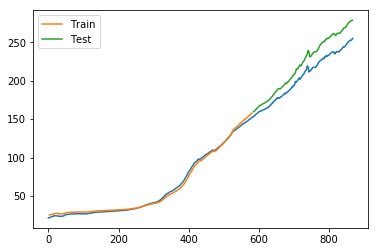

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
 - 3s - loss: 0.0408
Epoch 2/15
 - 0s - loss: 0.0241
Epoch 3/15
 - 0s - loss: 0.0179
Epoch 4/15
 - 0s - loss: 0.0146
Epoch 5/15
 - 0s - loss: 0.0113
Epoch 6/15
 - 0s - loss: 0.0080
Epoch 7/15
 - 0s - loss: 0.0050
Epoch 8/15
 - 0s - loss: 0.0026
Epoch 9/15
 - 0s - loss: 0.0011
Epoch 10/15
 - 0s - loss: 3.6880e-04
Epoch 11/15
 - 0s - loss: 1.1474e-04
Epoch 12/15
 - 0s - loss: 5.3974e-05
Epoch 13/15
 - 0s - loss: 4.1848e-05
Epoch 14/15
 - 0s - loss: 3.9775e-05
Epoch 15/15
 - 0s - loss: 3.8227e-05
Train Score: 1.43 RMSE
Test Sc

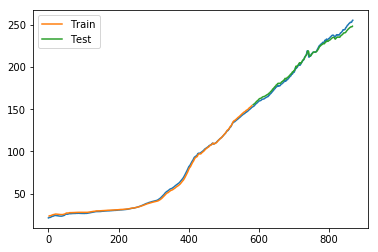

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [102]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 6, 
              epochs = 11)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 3, 
              epochs = 15)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
               ts = 'CPI', 
               look_back = 2, 
               epochs = 15, 
               type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'CPI', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'CPI', 
               #look_back = 3, 
                #epochs = 5) 

Predicting 3 Month Treasury Bill

Epoch 1/20
 - 3s - loss: 0.0993
Epoch 2/20
 - 0s - loss: 0.0636
Epoch 3/20
 - 0s - loss: 0.0410
Epoch 4/20
 - 0s - loss: 0.0287
Epoch 5/20
 - 0s - loss: 0.0229
Epoch 6/20
 - 0s - loss: 0.0203
Epoch 7/20
 - 0s - loss: 0.0185
Epoch 8/20
 - 0s - loss: 0.0168
Epoch 9/20
 - 0s - loss: 0.0149
Epoch 10/20
 - 0s - loss: 0.0130
Epoch 11/20
 - 0s - loss: 0.0110
Epoch 12/20
 - 0s - loss: 0.0090
Epoch 13/20
 - 0s - loss: 0.0072
Epoch 14/20
 - 0s - loss: 0.0055
Epoch 15/20
 - 0s - loss: 0.0040
Epoch 16/20
 - 0s - loss: 0.0029
Epoch 17/20
 - 0s - loss: 0.0021
Epoch 18/20
 - 0s - loss: 0.0015
Epoch 19/20
 - 0s - loss: 0.0012
Epoch 20/20
 - 0s - loss: 0.0010
Train Score: 0.51 RMSE
Test Score: 0.51 RMSE
Train Mean Absolute Error: 0.34 MAE
Test Mean Absolute Error: 0.43 MAE


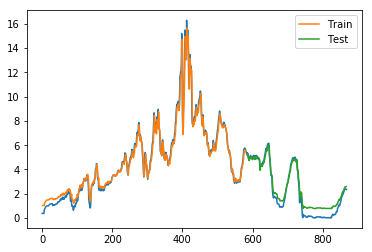

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 3s - loss: 0.1311
Epoch 2/20
 - 0s - loss: 0.0859
Epoch 3/20
 - 0s - loss: 0.0525
Epoch 4/20
 - 0s - loss: 0.0301
Epoch 5/20
 - 0s - loss: 0.0203
Epoch 6/20
 - 0s - loss: 0.0165
Epoch 7/20
 - 0s - loss: 0.0138
Epoch 8/20
 - 0s - loss: 0.0115
Epoch 9/20
 - 0s - loss: 0.0093
Epoch 10/20
 - 0s - loss: 0.0074
Epoch 11/20
 - 0s - loss: 0.0059
Epoch 12/20
 - 0s - loss: 0.0047
Epoch 13/20
 - 0s - loss: 0.0038
Epoch 14/20
 - 0s - loss: 0.0032
Epoch 15/20
 - 0s - loss: 0.0028
Epoch 16/20
 - 0s - loss: 0.0026
Epoch 17/20
 - 0s - l

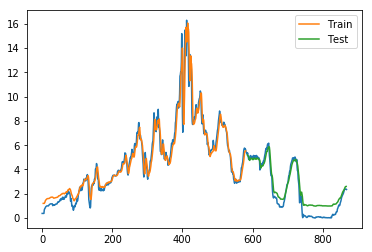

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 4s - loss: 0.0993
Epoch 2/20
 - 0s - loss: 0.0636
Epoch 3/20
 - 0s - loss: 0.0410
Epoch 4/20
 - 0s - loss: 0.0287
Epoch 5/20
 - 0s - loss: 0.0229
Epoch 6/20
 - 0s - loss: 0.0203
Epoch 7/20
 - 0s - loss: 0.0185
Epoch 8/20
 - 0s - loss: 0.0168
Epoch 9/20
 - 0s - loss: 0.0149
Epoch 10/20
 - 0s - loss: 0.0130
Epoch 11/20
 - 0s - loss: 0.0110
Epoch 12/20
 - 0s - loss: 0.0090
Epoch 13/20
 - 0s - loss: 0.0072
Epoch 14/20
 - 0s - loss: 0.0055
Epoch 15/20
 - 0s - loss: 0.0040
Epoch 16/20
 - 0s - loss: 0.0029
Epoch 17/20
 - 0s - l

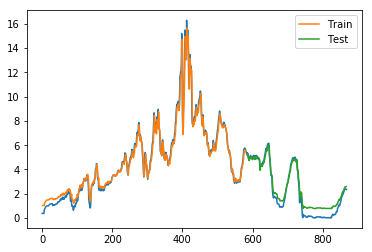

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [103]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Rate', 
              look_back = 1, 
              epochs = 20)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Rate', 
              look_back = 3, 
              epochs = 20)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Rate', 
              look_back = 1, 
              epochs = 20, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Rate', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Rate', 
               #look_back = 3, 
                #epochs = 5) 

Epoch 1/20
 - 4s - loss: 0.1689
Epoch 2/20
 - 0s - loss: 0.1203
Epoch 3/20
 - 0s - loss: 0.0822
Epoch 4/20
 - 0s - loss: 0.0540
Epoch 5/20
 - 0s - loss: 0.0347
Epoch 6/20
 - 0s - loss: 0.0233
Epoch 7/20
 - 0s - loss: 0.0177
Epoch 8/20
 - 0s - loss: 0.0152
Epoch 9/20
 - 0s - loss: 0.0142
Epoch 10/20
 - 0s - loss: 0.0135
Epoch 11/20
 - 0s - loss: 0.0129
Epoch 12/20
 - 0s - loss: 0.0122
Epoch 13/20
 - 0s - loss: 0.0115
Epoch 14/20
 - 0s - loss: 0.0108
Epoch 15/20
 - 0s - loss: 0.0100
Epoch 16/20
 - 0s - loss: 0.0093
Epoch 17/20
 - 0s - loss: 0.0085
Epoch 18/20
 - 0s - loss: 0.0078
Epoch 19/20
 - 0s - loss: 0.0070
Epoch 20/20
 - 0s - loss: 0.0062
Train Score: 1.10 RMSE
Test Score: 2.10 RMSE
Train Mean Absolute Error: 0.85 MAE
Test Mean Absolute Error: 2.01 MAE


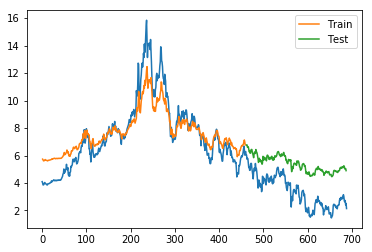

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 3s - loss: 0.2214
Epoch 2/20
 - 0s - loss: 0.1611
Epoch 3/20
 - 0s - loss: 0.1096
Epoch 4/20
 - 0s - loss: 0.0656
Epoch 5/20
 - 0s - loss: 0.0331
Epoch 6/20
 - 0s - loss: 0.0171
Epoch 7/20
 - 0s - loss: 0.0116
Epoch 8/20
 - 0s - loss: 0.0102
Epoch 9/20
 - 0s - loss: 0.0095
Epoch 10/20
 - 0s - loss: 0.0086
Epoch 11/20
 - 0s - loss: 0.0079
Epoch 12/20
 - 0s - loss: 0.0072
Epoch 13/20
 - 0s - loss: 0.0065
Epoch 14/20
 - 0s - loss: 0.0059
Epoch 15/20
 - 0s - loss: 0.0052
Epoch 16/20
 - 0s - loss: 0.0047
Epoch 17/20
 - 0s - l

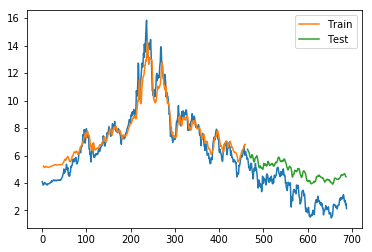

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 3s - loss: 0.1689
Epoch 2/20
 - 0s - loss: 0.1203
Epoch 3/20
 - 0s - loss: 0.0822
Epoch 4/20
 - 0s - loss: 0.0540
Epoch 5/20
 - 0s - loss: 0.0347
Epoch 6/20
 - 0s - loss: 0.0233
Epoch 7/20
 - 0s - loss: 0.0177
Epoch 8/20
 - 0s - loss: 0.0152
Epoch 9/20
 - 0s - loss: 0.0142
Epoch 10/20
 - 0s - loss: 0.0135
Epoch 11/20
 - 0s - loss: 0.0129
Epoch 12/20
 - 0s - loss: 0.0122
Epoch 13/20
 - 0s - loss: 0.0115
Epoch 14/20
 - 0s - loss: 0.0108
Epoch 15/20
 - 0s - loss: 0.0100
Epoch 16/20
 - 0s - loss: 0.0093
Epoch 17/20
 - 0s - l

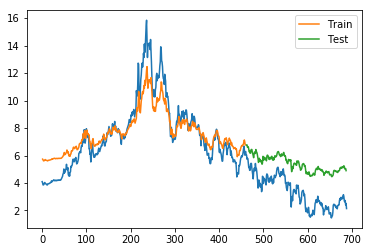

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [112]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Ten_Rate', 
              look_back = 1, #1
              epochs = 20) #20

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Ten_Rate', 
              look_back = 3, #3
              epochs = 20) #20

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Ten_Rate', 
              look_back = 1, #1
              epochs = 20, #20
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Ten_Rate', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Ten_Rate', 
               #look_back = 3, 
                #epochs = 5) 